## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
df.head()
#len(df['brand_name'].unique())

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,...,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,...,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,...,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,...,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,...,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254


In [3]:
df.shape

(504989, 31)

In [4]:
df.dtypes

search_term                            object
product_variant_id                     object
city_id                                object
query_type                             object
is_clicked                            float64
total_clicks                            int64
session_views                           int64
query_products_clicks_last_30_days      int64
CTR_last_30_days                      float64
CTR_last_7_days                       float64
CTR_product_30_days                   float64
query_product_plt_clicks_60_days        int64
query_product_plt_ctr_60_days         float64
CTR_plt_30_days                       float64
predicted_category_name                object
predicted_subcategory_name             object
query_product_plt_clicks_30_days        int64
product_name                           object
brand_name                             object
category_name                          object
subcategory_name                       object
latest_margin                     

## Converting Query_type feature into binary numeric type so that it can be used to evaluate correlational coefficient

In [5]:
df.loc[df['query_type'] == 'tail', 'query_type'] = '0'
df.loc[df['query_type'] != '0', 'query_type'] = '1'

In [6]:
df['query_type']=pd.to_numeric(df['query_type'])

In [7]:
#df['predicted_category_name']
print(len(df['product_name'].unique()))
print(len(df['product_variant_id'].unique()))
print(len(df['search_term'].unique()))

26277
30353
1997


## creating a new dataframe df2 to store all the numeric features

In [8]:
## df2 column contains all the features that are not of object data type and can be used to evaluate the correlational coefficient with
## 'is_clicked' feature
df2=pd.DataFrame()
req_columns=[]
for cols in df.columns:
    if (df[cols].dtype=='float64' or df[cols].dtype=='int64'):
        req_columns.append(df[cols])
df2=pd.concat(req_columns,axis=1)

In [9]:
df2.dtypes

query_type                              int64
is_clicked                            float64
total_clicks                            int64
session_views                           int64
query_products_clicks_last_30_days      int64
CTR_last_30_days                      float64
CTR_last_7_days                       float64
CTR_product_30_days                   float64
query_product_plt_clicks_60_days        int64
query_product_plt_ctr_60_days         float64
CTR_plt_30_days                       float64
query_product_plt_clicks_30_days        int64
latest_margin                         float64
savings                               float64
savings_with_pass                     float64
ad_revenue                            float64
total_unique_orders                     int64
product_atcs_30_days                    int64
product_atcs_plt_30_days                int64
total_unique_orders_plt_30_days         int64
product_ctr_city_30_days              float64
query_product_similarity          

In [10]:
correlations=df2.corr()
target_corr=correlations['is_clicked'].drop('is_clicked').sort_values(ascending=False)
print(target_corr)
## target_corr contains correlational coefficients of all the features of df2 with 'is_clicked'

query_product_similarity              0.380413
CTR_last_30_days                      0.301190
query_product_plt_ctr_60_days         0.280107
CTR_product_30_days                   0.254466
CTR_last_7_days                       0.242047
CTR_plt_30_days                       0.206733
session_views                         0.204488
product_ctr_city_30_days              0.171598
query_type                            0.155942
total_unique_orders                   0.100276
total_unique_orders_plt_30_days       0.096370
product_atcs_30_days                  0.084168
product_atcs_plt_30_days              0.081496
query_product_plt_clicks_30_days      0.081034
query_product_plt_clicks_60_days      0.073309
total_clicks                          0.051524
query_products_clicks_last_30_days    0.049228
ad_revenue                            0.041413
savings_with_pass                     0.028192
latest_margin                        -0.053335
savings                              -0.059343
Name: is_clic

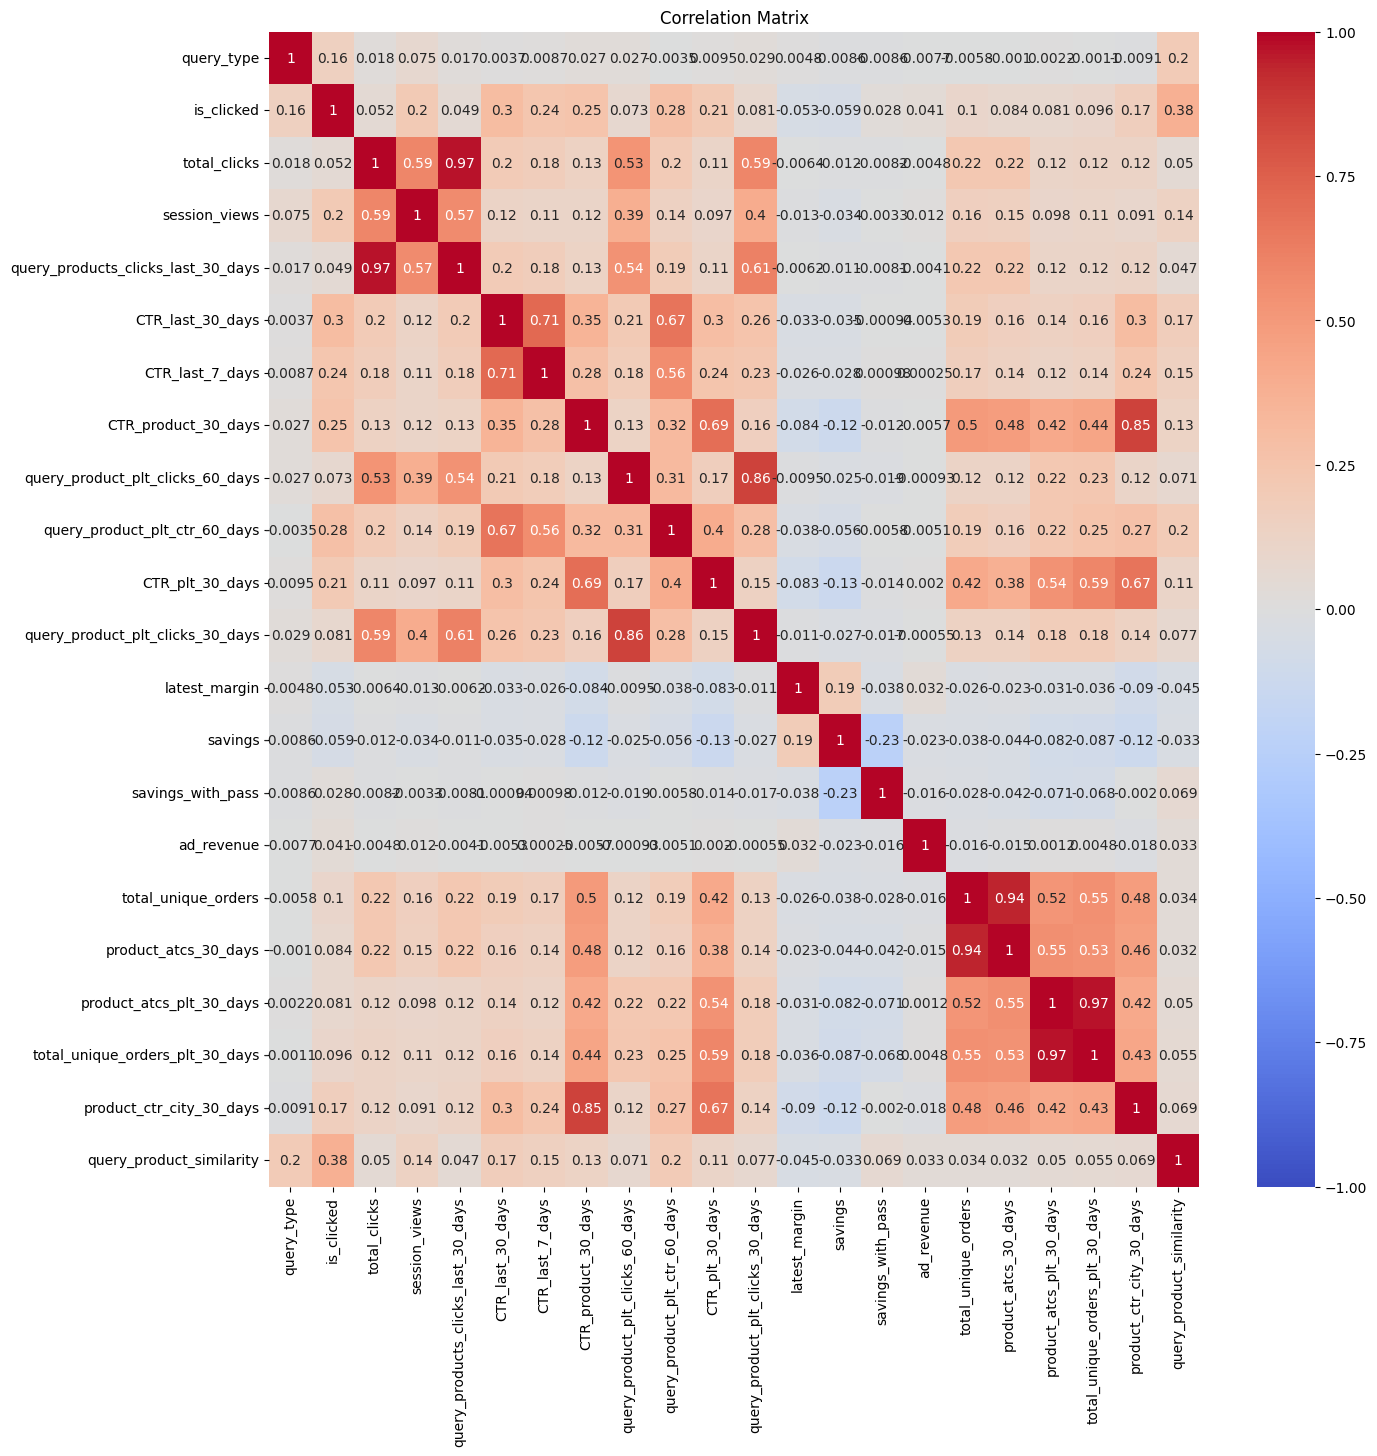

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
necessary_cols=[]
col_names=[]
for cols in target_corr.index:
    if(target_corr[cols]>=0.2):
        col_names.append(cols)
        necessary_cols.append(df2[cols])
    else:
        break
#print(necessary_cols)
## necessary_cols are the all the columns with corr_coefficient greater than 0.2

In [12]:
df_new=pd.DataFrame()
df_new=pd.concat(necessary_cols,axis=1)
#df_new.head()
df_new.shape

## df_new contains all the necessary_cols

(504989, 7)

## Importing libraries for Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Using Logistic Regression to find coefficients

In [14]:
y=df2['is_clicked']
x=df_new
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model=lr()
model.fit(X_train,y_train)

coefficients = model.coef_[0]
print(coefficients)
print(len(coefficients))

## coefficients contain all the coefficients of the necessary_cols used to find out the relevance score

[ 2.47690945e+00  5.35399445e+01  3.66298360e+01  1.55087582e+01
  3.58329480e+01 -1.92095805e+00  2.60247550e-03]
7


/Users/abhigyantripathi/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Creating our own feature of Relevance score(Feature engineering)

In [15]:
df2['relevance_score']=0
for i in range(0,7):
    df2['relevance_score']+=df[col_names[i]]*(coefficients[i])

In [16]:
df['relevance_score']=df2['relevance_score']

In [17]:
df.sort_values(by=['search_term','city_id','relevance_score'])

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,...,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity,relevance_score
263039,3 roses,c888e86b-70e9-4dac-a145-523bac1926c0,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,1,0.0,0,0,0,0.000000,0.000000,...,0.109091,4.385455,34.587244,548,865,26254,18193,0.044568,0.176924,0.009597
408987,3 roses,ee4c6d5e-4cd6-4ea0-a49a-aea0de542a09,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,1,0.0,0,0,0,0.000000,0.000000,...,0.594687,2.621250,9.190925,29,156,1432,306,0.013612,0.053204,0.107358
223224,3 roses,13cb735d-b180-44eb-a6da-3387f9aa4e5a,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,1,0.0,0,0,0,0.000000,0.000000,...,0.474583,1.492183,0.000000,25,132,2428,513,0.006171,0.063583,0.157490
169815,3 roses,9142abd1-3b38-4a25-9a67-a3e543810be8,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,1,0.0,0,0,0,0.000000,0.000000,...,0.811285,2.461830,0.000000,183,487,17030,7083,0.030964,0.078741,0.195035
89942,3 roses,a51bdc97-749f-4c3a-8117-3dc0646adfc8,056e834d-a1d2-4df3-a93d-7ebd60e6bb16,1,0.0,0,0,0,0.000000,0.000000,...,0.102026,6.718525,0.000000,11,52,1361,405,0.003112,0.100354,0.221049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416425,zorabian,53d43042-1700-4907-8f9e-44822fdc0182,bedfb594-54b5-4976-8b57-3e1f347e413a,1,0.0,0,73,0,0.000000,0.000000,...,0.043137,4.827451,7.996453,32,57,3530,2072,0.025953,0.441503,2.918613
95048,zorabian,1c28c1be-edb5-45a9-b98e-bd33cfc1817e,bedfb594-54b5-4976-8b57-3e1f347e413a,1,1.0,16,467,1,0.006623,0.000000,...,0.019394,7.137109,7.996453,68,130,1312,663,0.011306,0.397795,3.328455
234538,zorabian,afffedcf-11d1-4db0-9fcc-f13972aaac34,facade53-8330-4ebe-b07e-55319220a301,1,1.0,1,33,0,0.000000,0.000000,...,0.258539,1.266903,0.000000,0,0,0,0,0.000000,0.335210,1.458699
79334,zorabian,d87e5c13-6609-49ae-8a31-71d2e1dbf1eb,facade53-8330-4ebe-b07e-55319220a301,1,1.0,20,101,6,0.272727,0.000000,...,0.000000,8.886792,7.996453,28,80,2437,1236,0.008859,0.344595,17.215456
